# K-Nearest Neighbors algorithm on diabetes.csv dataset

In [ ]:
Name = Sana Sunni
Email id = sanasunni.official@gmail.com

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.sample(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
192,7,159,66,0,0,30.4,0.383,36,1
377,1,87,60,37,75,37.2,0.509,22,0
339,7,178,84,0,0,39.9,0.331,41,1
314,7,109,80,31,0,35.9,1.127,43,1
618,9,112,82,24,0,28.2,1.282,50,1


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratory Data analysis

<Axes: >

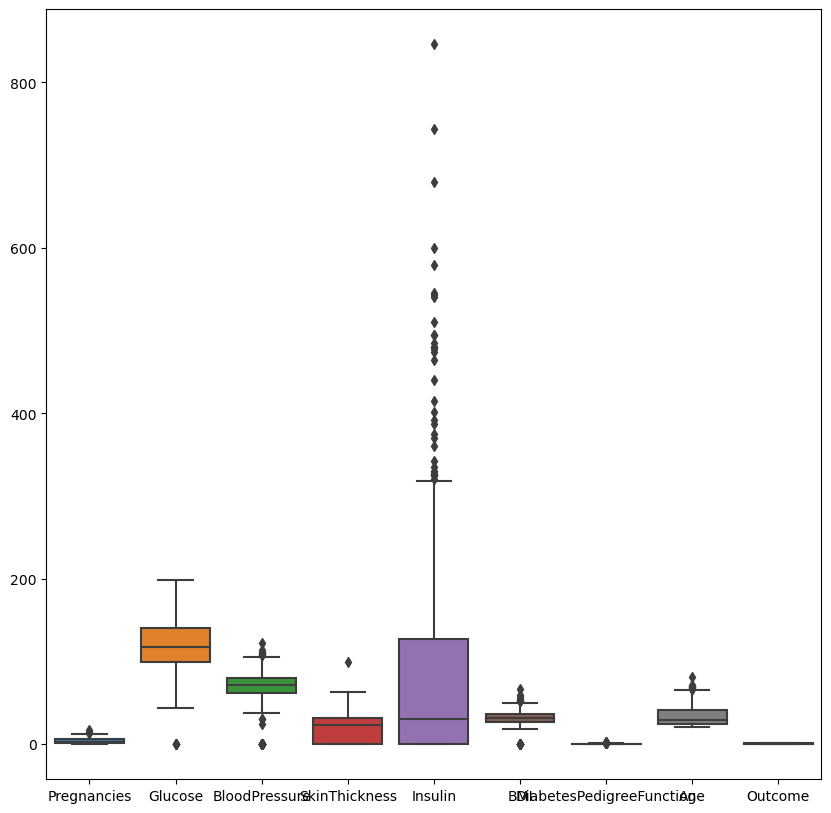

In [11]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

In [12]:
def remove_outlier(dataframe , col):
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    dataframe[col] = np.clip(dataframe[col] , lower_whisker , upper_whisker)
    return dataframe


In [13]:
def treat_outliers_all(dataframe , col_list):
    for c in col_list:
        dataframe = remove_outlier(dataframe , c)
    return dataframe


In [14]:
df1 = treat_outliers_all(df, df.columns)

<Axes: >

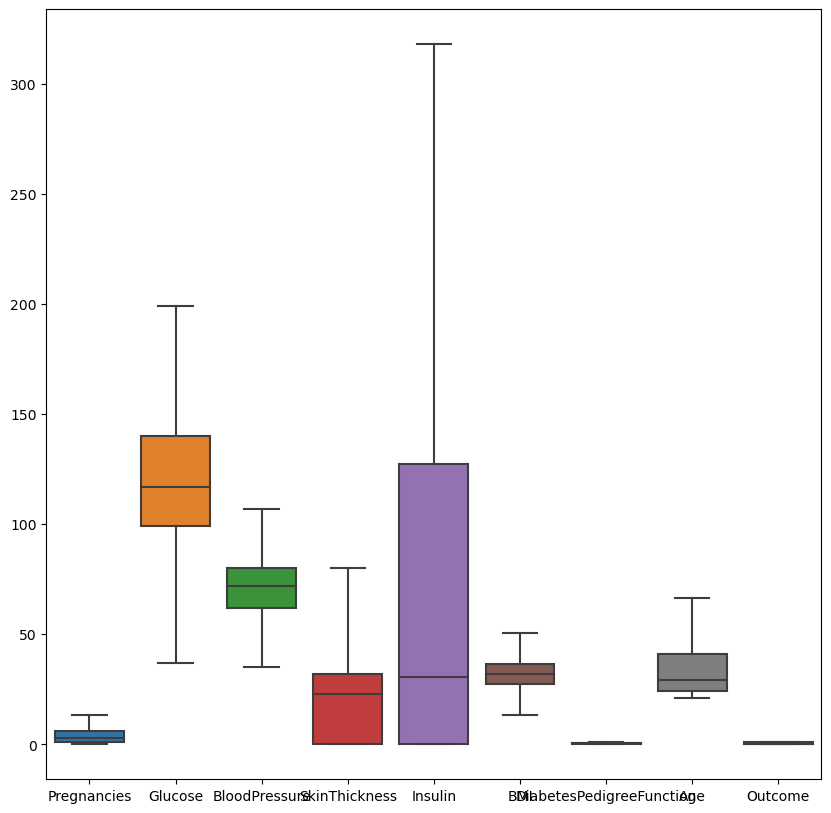

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df1)


In [16]:
df1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

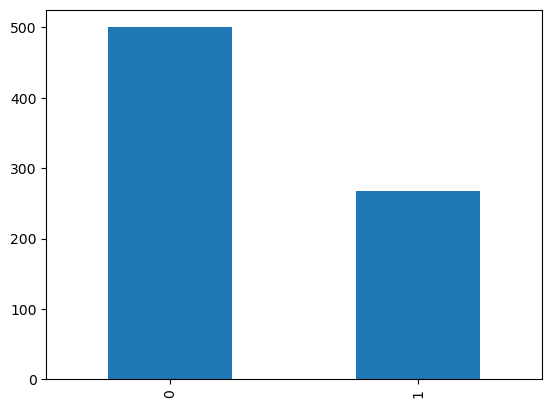

In [17]:
# imbalance classifier
df1['Outcome'].value_counts().plot(kind='bar')

In [18]:
x=df1.drop('Outcome',axis=1)
y=df1['Outcome']
print(x.shape)
print(y.shape)


(768, 8)
(768,)


## Splitting dataset into training and testing set 

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=31,stratify=y)

In [20]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

<Axes: >

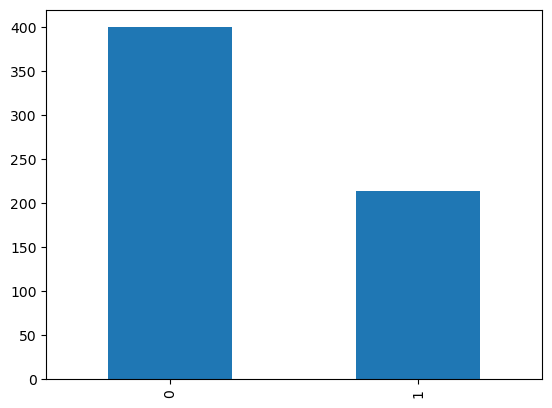

In [21]:
y_train.value_counts().plot(kind='bar')


In [22]:
y_test.value_counts()


0    100
1     54
Name: Outcome, dtype: int64

<Axes: >

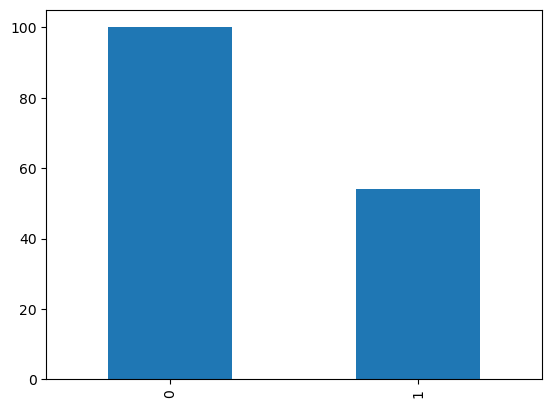

In [24]:
y_test.value_counts().plot(kind='bar')


### Feature Scaling
 

<Axes: ylabel='Count'>

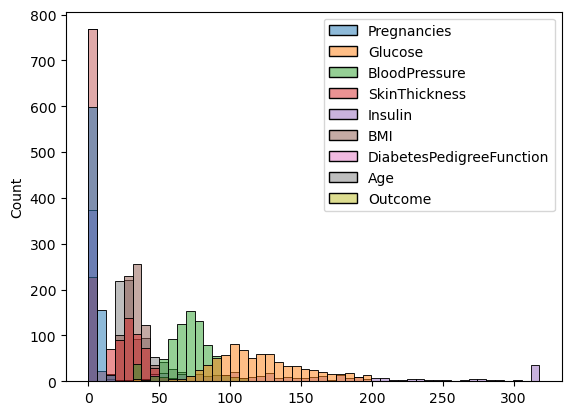

In [25]:
sns.histplot(data=df1)

<Axes: ylabel='Density'>

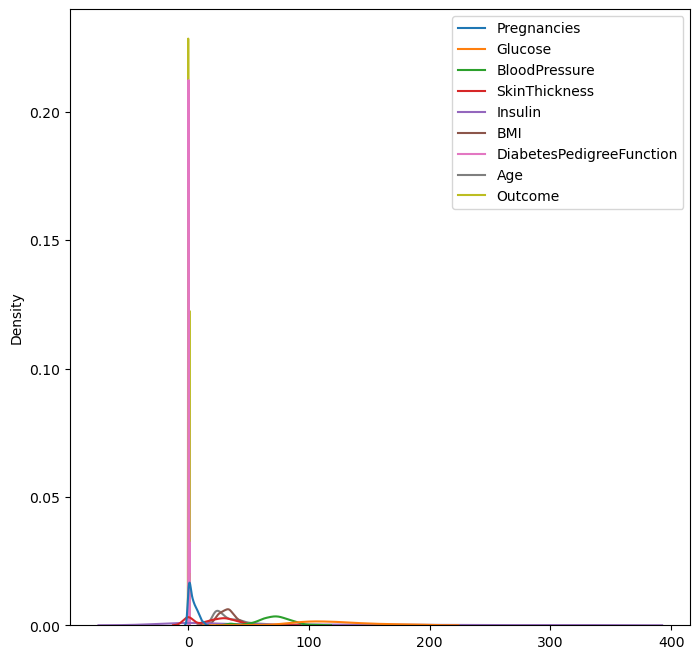

In [26]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=df1)

In [27]:
# Use StandardScaler for normally distributed data, otherwise use MinMaxScaler.
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
x_train_scaled


array([[0.22222222, 0.42548263, 0.26388889, ..., 0.47177419, 0.19073084,
        0.06593407],
       [0.2962963 , 0.33899614, 0.625     , ..., 0.77553763, 0.14171123,
        0.17582418],
       [0.2962963 , 0.55521236, 0.73611111, ..., 0.56854839, 0.46345811,
        0.15384615],
       ...,
       [0.2962963 , 0.9011583 , 0.        , ..., 0.40456989, 0.11942959,
        0.32967033],
       [0.51851852, 0.87644788, 0.83333333, ..., 0.56048387, 0.07664884,
        0.85714286],
       [0.74074074, 0.68494208, 0.68055556, ..., 0.65188172, 0.82263815,
        0.65934066]])

In [29]:
x_train_scaled_df = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_train_scaled_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.222222,0.425483,0.263889,0.333333,0.496660,0.471774,0.190731,0.065934
1,0.296296,0.338996,0.625000,0.000000,0.000000,0.775538,0.141711,0.175824
2,0.296296,0.555212,0.736111,0.174603,0.487230,0.568548,0.463458,0.153846
3,0.518519,0.697297,0.597222,0.460317,0.396071,0.587366,0.547237,0.725275
4,0.148148,0.332819,0.375000,0.000000,0.000000,0.375000,0.398396,0.021978
...,...,...,...,...,...,...,...,...
609,0.074074,0.388417,0.513889,0.190476,0.220039,0.321237,0.516934,0.153846
610,0.518519,0.505792,0.000000,0.000000,0.000000,0.318548,0.116756,0.351648
611,0.296296,0.901158,0.000000,0.000000,0.000000,0.404570,0.119430,0.329670
612,0.518519,0.876448,0.833333,0.492063,0.000000,0.560484,0.076649,0.857143


In [30]:
x_test_scaled_df = pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_test_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.148148,0.629344,0.555556,0.000000,0.000000,0.329301,0.079323,0.175824
1,0.666667,0.530502,0.486111,0.698413,0.295481,0.530914,0.263815,0.417582
2,0.000000,0.864093,0.347222,0.460317,1.000000,0.571237,0.885918,0.000000
3,0.296296,0.666409,0.652778,0.285714,0.000000,0.514785,0.139929,1.000000
4,0.222222,0.456371,0.291667,0.619048,0.000000,0.450269,0.426916,0.197802
...,...,...,...,...,...,...,...,...
149,0.000000,0.351351,0.000000,0.000000,0.000000,0.000000,0.158645,0.087912
150,0.074074,0.369884,0.430556,0.238095,0.440079,0.264785,0.364528,0.021978
151,0.592593,0.388417,0.569444,0.000000,0.000000,0.681452,0.099822,0.461538
152,0.666667,0.215444,0.597222,0.396825,0.000000,0.490591,0.180036,0.373626
